In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [6]:
!pip install kaggle

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d aaron7sun/stocknews

  0% 0.00/5.82M [00:00<?, ?B/s]
100% 5.82M/5.82M [00:00<00:00, 219MB/s]


In [12]:
!unzip /content/stocknews.zip

Archive:  /content/stocknews.zip
  inflating: Combined_News_DJIA.csv  
  inflating: RedditNews.csv          
  inflating: upload_DJIA_table.csv   


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [47]:
data = pd.read_csv('upload_DJIA_table.csv')


In [48]:
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values('Date')


In [95]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'].rolling(window=7).mean(),name="DJIA"),secondary_y=False,)
fig.update_layout(autosize=False,width=900,height=500,title_text="DJIA")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [96]:
n = len(data)

# Calculate the split indices
train_start = (n // 20) * 17
train_end = (n // 20) * 19
test_start = (n // 20) * 19

# Split the data into training and testing sets
train_data = data[train_start:train_end]
test_data = data[test_start:]

# Verify the number of data points in each set
print("Number of data points in the training set:", len(train_data))
print("Number of data points in the testing set:", len(test_data))


Number of data points in the training set: 198
Number of data points in the testing set: 108


In [97]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=train_data['Date'],y=train_data['Open'],name="Train"),secondary_y=False,)
fig.add_trace(go.Scatter(x=test_data['Date'],y=test_data['Open'],name="Test"),secondary_y=False,)
fig.update_layout(autosize=False,width=900,height=500,title_text="DJIA")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [98]:
test_data[0:3]

,Date,Open,High,Low,Close,Volume,Adj Close,PriceMovement
107,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,217940000,16466.300781,1
106,2016-02-01,16453.630859,16510.980469,16299.469727,16449.179688,114450000,16449.179688,1
105,2016-02-02,16420.210938,16420.210938,16108.440430,16153.540039,126210000,16153.540039,0


In [99]:
print(len(train_data))
print(len(test_data))

198
108


In [100]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data['Open'].values.reshape(-1,1))

In [101]:
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-5):      ######
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+5, 0])                   ###### predict 5 days after

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [102]:
print(x_train.shape)
print(y_train.shape)

(163, 30, 1)
(163,)


In [103]:
def LSTM_model():

    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    return model

In [104]:
model = LSTM_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])

# Train the model with your training data (x_train and y_train)
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions using the trained model
y_pred = model.predict(x_train)

# Evaluate the model as needed


Epoch 1/50
6/6 [==============================] - 8s 51ms/step - loss: 0.2324 - accuracy: 0.0061
Epoch 2/50
6/6 [==============================] - 0s 51ms/step - loss: 0.0921 - accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0684 - accuracy: 0.0061
Epoch 4/50
6/6 [==============================] - 0s 53ms/step - loss: 0.0596 - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 54ms/step - loss: 0.0547 - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0492 - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 55ms/step - loss: 0.0533 - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 52ms/step - loss: 0.0503 - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 59ms/step - loss: 0.0496 - accuracy: 0.0000e+00
Epoch 10/50
6/6 [==============================] - 0s 55ms/step - loss: 0.0492 - accuracy: 0.0000e+

In [105]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
his=model.fit(x_train,y_train,epochs=20,batch_size=32,callbacks=[checkpointer])

Epoch 1/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0321 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 54ms/step - loss: 0.0316 - accuracy: 0.0000e+00
Epoch 2/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0267 - accuracy: 0.0063

6/6 [==============================] - 0s 53ms/step - loss: 0.0266 - accuracy: 0.0061
Epoch 3/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0265 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 53ms/step - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 4/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0264 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 52ms/step - loss: 0.0260 - accuracy: 0.0000e+00
Epoch 5/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0273 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 54ms/step - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 6/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0251 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 55ms/step - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 7/20
6/6 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.0061    

6/6 [==============================] - 0s 49ms/step - loss: 0.0266 - accuracy: 0.0061
Epoch 8/20
6/6 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.0061

6/6 [==============================] - 1s 124ms/step - loss: 0.0401 - accuracy: 0.0061
Epoch 9/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0277 - accuracy: 0.0000e+00

6/6 [==============================] - 1s 80ms/step - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 10/20
6/6 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 58ms/step - loss: 0.0260 - accuracy: 0.0000e+00
Epoch 11/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0309 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 52ms/step - loss: 0.0310 - accuracy: 0.0000e+00
Epoch 12/20
6/6 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 58ms/step - loss: 0.0251 - accuracy: 0.0000e+00
Epoch 13/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.0063

6/6 [==============================] - 0s 55ms/step - loss: 0.0242 - accuracy: 0.0061
Epoch 14/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0282 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 52ms/step - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 15/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0263 - accuracy: 0.0063    

6/6 [==============================] - 0s 55ms/step - loss: 0.0259 - accuracy: 0.0061
Epoch 16/20
5/6 [========================>.....] - ETA: 0s - loss: 0.0248 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 54ms/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 17/20
6/6 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.0061

6/6 [==============================] - 0s 67ms/step - loss: 0.0281 - accuracy: 0.0061
Epoch 18/20
6/6 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.0061

6/6 [==============================] - 1s 88ms/step - loss: 0.0256 - accuracy: 0.0061
Epoch 19/20
6/6 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.0061

6/6 [==============================] - 1s 84ms/step - loss: 0.0248 - accuracy: 0.0061
Epoch 20/20
6/6 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 83ms/step - loss: 0.0236 - accuracy: 0.0000e+00


In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

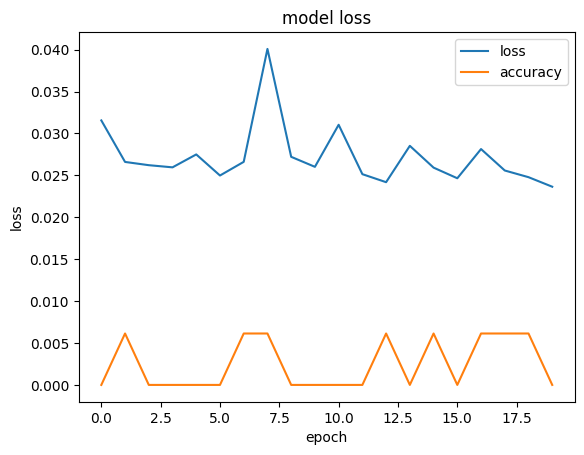

In [107]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='upper right')
plt.show()

In [76]:
actual_prices = test_data['Open'].values
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [110]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

4/4 [==============================] - 0s 14ms/step


In [151]:
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data) - 5):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x + 5, 0])  # Predict 5 days after

# Modify the loop to ensure x_train and y_train have the same number of samples
# You can trim the last 5 samples from x_train to match the length of y_train
x_train = x_train[:-5]

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)


(158, 30, 1)
(163,)


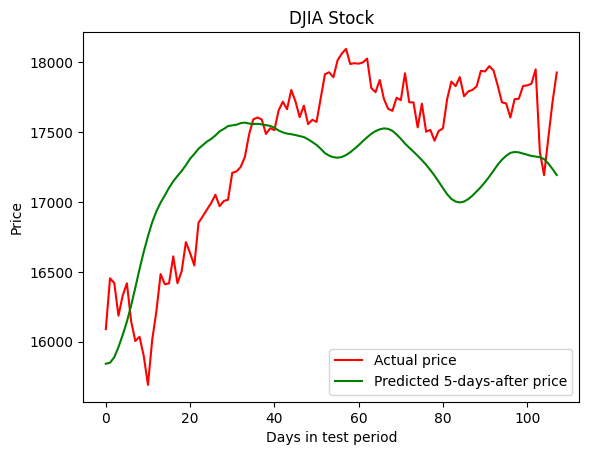

In [111]:
plt.plot(actual_prices, color='red', label=f"Actual price")
plt.plot(predicted_prices, color= 'green', label=f"Predicted 5-days-after price")
plt.title(f"DJIA Stock")
plt.xlabel("Days in test period")
plt.ylabel(f"Price")
plt.legend()
plt.show()

In [112]:
test_data['predict']=predicted_prices
test_data[0:10]

<ipython-input-112-6b89bf292c4d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,Adj Close,PriceMovement,predict
107,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,217940000,16466.300781,1,15842.889648
106,2016-02-01,16453.630859,16510.980469,16299.469727,16449.179688,114450000,16449.179688,1,15850.165039
105,2016-02-02,16420.210938,16420.210938,16108.440430,16153.540039,126210000,16153.540039,0,15889.218750
104,2016-02-03,16186.200195,16381.690430,15960.450195,16336.660156,141870000,16336.660156,0,15961.803711
103,2016-02-04,16329.669922,16485.839844,16266.160156,16416.580078,131490000,16416.580078,1,16048.467773
102,2016-02-05,16417.949219,16423.630859,16129.809570,16204.969727,139010000,16204.969727,0,16143.534180
101,2016-02-08,16147.509766,16147.509766,15803.549805,16027.049805,165880000,16027.049805,0,16258.151367
100,2016-02-09,16005.410156,16136.620117,15881.110352,16014.379883,127740000,16014.379883,0,16386.554688
99,2016-02-10,16035.610352,16201.889648,15899.910156,15914.740234,122290000,15914.740234,1,16519.537109
98,2016-02-11,15897.820312,15897.820312,15503.009766,15660.179688,172070000,15660.179688,0,16642.982422


In [115]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=train_data['Date'],y=train_data['Open'],name="Train Actual"),secondary_y=False,)
fig.add_trace(go.Scatter(x=test_data['Date'],y=test_data['Open'],name="Test Actual"),secondary_y=False,)
fig.add_trace(go.Scatter(x=test_data['Date'],y=test_data['predict'],name="Predicted 5-days after price"),secondary_y=False,)
fig.update_layout(autosize=False,width=900,height=500,title_text="DJIA")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [116]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 29, 1)


In [120]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction[0][0]}")

1/1 [==============================] - 0s 48ms/step
prediction: 17172.140625


In [108]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your data and preprocess it as needed
# Assuming you have a DataFrame with 'Date' and 'Open' columns

# Define a threshold for price movement classification (e.g., if Open price increases, it's "Up")
threshold = 0

# Create a new binary column for price movements
data['PriceMovement'] = (data['Open'].diff() > threshold).astype(int)

# Split the data into features (X) and target (y)
X = data[['Open']]
y = data['PriceMovement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.49246231155778897
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       188
           1       0.52      0.56      0.54       210

    accuracy                           0.49       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.49      0.49      0.49       398

Confusion Matrix:
[[ 79 109]
 [ 93 117]]


In [132]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load your time series data
# Assuming you have a DataFrame with 'Date' and 'Open' columns

# Sort the data by date if it's not sorted
data.sort_values(by='Date', inplace=True)

# Split the data into features (X) and target (y)
X = data[['Open']]
y = data['Open']  # Predicting the Open price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
combined_data = pd.concat([X_test, pd.Series(y_pred, index=X_test.index)], axis=1)
combined_data.columns = ['Actual', 'Predicted']




R-squared Score: 0.9999974152816541
Mean Squared Error: 26.46006216881418


In [156]:
from tensorflow.keras.layers import Flatten

def FNN_model():
    model = Sequential()
    model.add(Flatten(input_shape=(x_train.shape[1], 1)))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=1))
    return model

# Create a new instance of the feedforward neural network model
model_fnn = FNN_model()
model_fnn.summary()
model_fnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 30)                0         
                                                                 
 dense_25 (Dense)            (None, 50)                1550      
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4151 (16.21 KB)
Trainable params: 4151 (16.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-5):      ######
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+5, 0])                   ###### predict 5 days after

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [159]:
# Create the FNN model
model = FNN_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with your training data (x_train and y_train)
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions using the trained model
y_pred = model.predict(x_train)


Epoch 1/50
6/6 [==============================] - 1s 4ms/step - loss: 1.1644 - accuracy: 0.0061
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.0061
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.0000e+00
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.0000e+00
Epoch 1

In [182]:
model_fnn = FNN_model()
model_fnn.summary()
model_fnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 30)                0         
                                                                 
 dense_49 (Dense)            (None, 50)                1550      
                                                                 
 dense_50 (Dense)            (None, 50)                2550      
                                                                 
 dense_51 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4151 (16.21 KB)
Trainable params: 4151 (16.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
checkpointer_fnn = ModelCheckpoint(filepath='weights_best_fnn.hdf5', verbose=1, save_best_only=True)
his_fnn = model_fnn.fit(x_train, y_train, epochs=20, batch_size=32, callbacks=[checkpointer_fnn])

Epoch 1/20
1/6 [====>.........................] - ETA: 4s - loss: 0.4332 - accuracy: 0.0000e+00

6/6 [==============================] - 1s 5ms/step - loss: 0.2172 - accuracy: 0.0061
Epoch 2/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0954 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.0000e+00
Epoch 3/20
1/6 [====>.........................] - ETA: 0s - loss: 0.1007 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.0686 - accuracy: 0.0000e+00
Epoch 4/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0724 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.0000e+00
Epoch 5/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0408 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.0000e+00
Epoch 6/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0335 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.0000e+00
Epoch 7/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0292 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 8/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0367 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.0000e+00
Epoch 9/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0299 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 10/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0302 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 11/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0294 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.0000e+00
Epoch 12/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0273 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.0061
Epoch 13/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0217 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.0000e+00
Epoch 14/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0204 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.0061
Epoch 15/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0229 - accuracy: 0.0312

6/6 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.0061
Epoch 16/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0124 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.0000e+00
Epoch 17/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0240 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.0061
Epoch 18/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0151 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 19/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0167 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.0000e+00
Epoch 20/20
1/6 [====>.........................] - ETA: 0s - loss: 0.0149 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.0000e+00


In [184]:
predicted_prices_fnn = model_fnn.predict(x_test)
predicted_prices_fnn = scaler.inverse_transform(predicted_prices_fnn)


4/4 [==============================] - 0s 3ms/step


In [185]:
actual_prices_fnn = test_data['Open'].values
total_dataset_fnn = pd.concat((train_data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

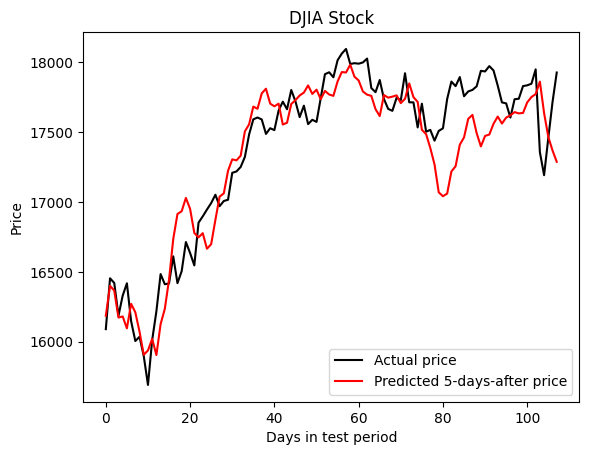

In [186]:
plt.plot(actual_prices_fnn, color='black', label=f"Actual price")
plt.plot(predicted_prices_fnn, color= 'red', label=f"Predicted 5-days-after price")
plt.title(f"DJIA Stock")
plt.xlabel("Days in test period")
plt.ylabel(f"Price")
plt.legend()
plt.show()

In [206]:
test_data['predict']=predicted_prices_fnn
test_data[0:20]

<ipython-input-206-33656fee9654>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,Adj Close,PriceMovement,predict,predict_fnn
107,2016-01-29,16090.259766,16466.300781,16090.259766,16466.300781,217940000,16466.300781,1,16185.891602,16271.395508
106,2016-02-01,16453.630859,16510.980469,16299.469727,16449.179688,114450000,16449.179688,1,16399.695312,16251.115234
105,2016-02-02,16420.210938,16420.210938,16108.440430,16153.540039,126210000,16153.540039,0,16366.122070,16255.580078
104,2016-02-03,16186.200195,16381.690430,15960.450195,16336.660156,141870000,16336.660156,0,16173.237305,16228.951172
103,2016-02-04,16329.669922,16485.839844,16266.160156,16416.580078,131490000,16416.580078,1,16180.941406,16163.301758
102,2016-02-05,16417.949219,16423.630859,16129.809570,16204.969727,139010000,16204.969727,0,16095.885742,16102.545898
101,2016-02-08,16147.509766,16147.509766,15803.549805,16027.049805,165880000,16027.049805,0,16271.321289,16104.982422
100,2016-02-09,16005.410156,16136.620117,15881.110352,16014.379883,127740000,16014.379883,0,16210.762695,16129.728516
99,2016-02-10,16035.610352,16201.889648,15899.910156,15914.740234,122290000,15914.740234,1,16071.603516,15898.117188
98,2016-02-11,15897.820312,15897.820312,15503.009766,15660.179688,172070000,15660.179688,0,15906.845703,16111.907227


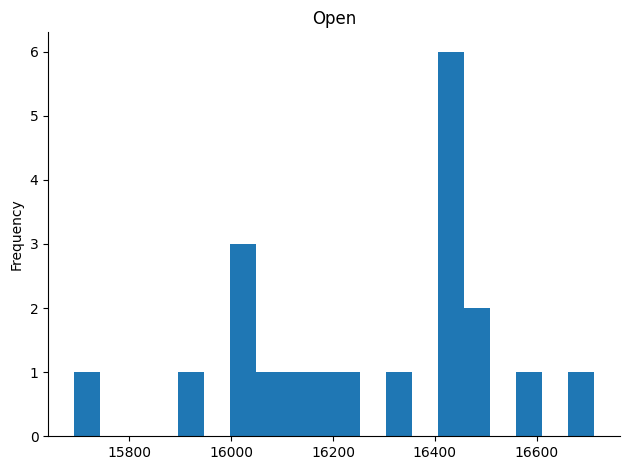

In [202]:
from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

Epoch 1/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.0061
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.0061
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0061
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 0.0061
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.0061
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 0.0061
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 0.0061
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0052 - accuracy: 0.0061
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.0061
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.0061
Epoch 11/50
6/6 [======================

Text(0.5, 0, 'Epoch')

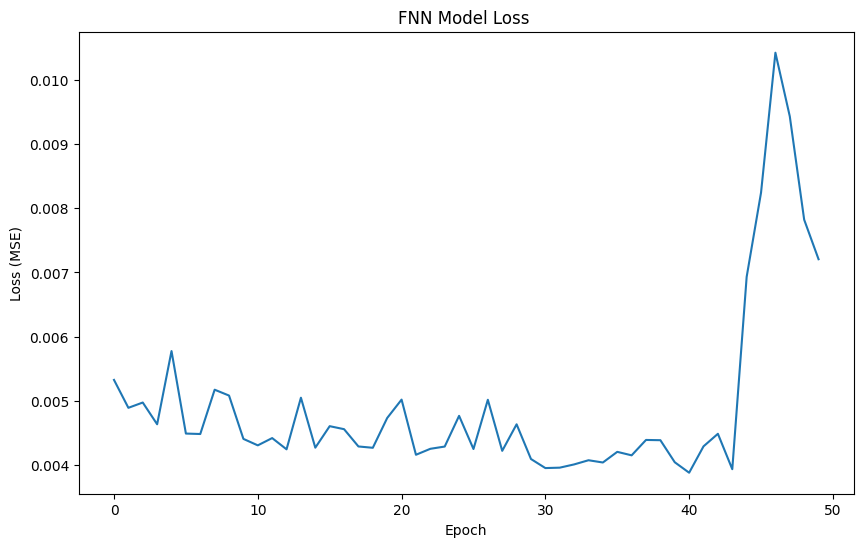

In [194]:
import matplotlib.pyplot as plt

# Train the FNN model with your training data (x_train and y_train)
history_fnn = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create a single graph with both loss and accuracy
plt.figure(figsize=(10, 6))

# Plot loss (MSE)
plt.plot(history_fnn.history['loss'], label='Loss (MSE)')
plt.title('FNN Model Loss ')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')



In [163]:
test_data['predict_fnn'] = predicted_prices_fnn

<ipython-input-163-5275150002fa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
fig = make_subplots(specs=[[{"secondary_y": False}]])
fig.add_trace(go.Scatter(x=train_data['Date'], y=train_data['Open'], name="Train Actual"), secondary_y=False)
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['Open'], name="Test Actual"), secondary_y=False)
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['predict'], name="Predicted 5-days after price (LSTM)"), secondary_y=False)
fig.add_trace(go.Scatter(x=test_data['Date'], y=test_data['predict_fnn'], name="Predicted 5-days after price (FNN)"), secondary_y=False)
fig.update_layout(autosize=False, width=900, height=500, title_text="DJIA")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices", secondary_y=False)
fig.show()